## System setup

---


##### Importing modules


In [1]:
import os
import gc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.rcParams.update({"font.size": 16})

import cv2 as cv

from tqdm import tqdm, trange

from toolkit.classes import DataSet, ImageProcessor


2023-01-05 22:24:28.513167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-05 22:24:28.749285: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/demust/py39/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-05 22:24:28.749311: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-05 22:24:30.014577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror:

## Read dataset

---


##### Create image dataframe


In [2]:
images = DataSet()

In [3]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)
images.data

Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 175 images in ./preprocessed/Train/Non defective/
Found 175 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


type  defect     defect_str                         path filename  \
0    train       0  Non defective  ./data/Train/Non defective/   97.jpg   
1    train       0  Non defective  ./data/Train/Non defective/   79.jpg   
2    train       0  Non defective  ./data/Train/Non defective/  114.jpg   
3    train       0  Non defective  ./data/Train/Non defective/   18.jpg   
4    train       0  Non defective  ./data/Train/Non defective/   46.jpg   
..     ...     ...            ...                          ...      ...   
379   test       1      Defective       ./data/Test/Defective/  381.jpg   
380   test       1      Defective       ./data/Test/Defective/  379.jpg   
381   test       1      Defective       ./data/Test/Defective/  377.jpg   
382   test       1      Defective       ./data/Test/Defective/  380.jpg   
383   test       1      Defective       ./data/Test/Defective/  375.jpg   

                                    img  height  width  components  R_mean  \
0     ./data/Train/Non defective/97.jpg       0      0           0     0.0   
1     ./data/Train/Non defective/79.jpg       0      0           0     0.0   
2    ./data/Train/Non defective/114.jpg       0      0           0     0.0   
3     ./data/Train/Non defective/18.jpg       0      0           0     0.0   
4     ./data/Train/Non defective/46.jpg       0      0           0     0.0   
..                                  ...     ...    ...         ...     ...   
379       ./data/Test/Defective/381.jpg       0      0           0     0.0   
380       ./data/Test/Defective/379.jpg       0      0           0     0.0   
381       ./data/Test/Defective/377.jpg       0      0           0     0.0   
382       ./data/Test/Defective/380.jpg       0      0           0     0.0   
383       ./data/Test/Defective/375.jpg       0      0           0     0.0   

     G_mean  B_mean  
0       0.0     0.0  
1       0.0     0.0  
2       0.0     0.0  
3       0.0     0.0  
4       0.0     0.0  
..      ...     ...  
379     0.0     0.0  
380     0.0     0.0  
381     0.0     0.0  
382     0.0     0.0  
383     0.0     0.0  

[384 rows x 12 columns]

##### Generate random sample from training data


In [51]:
images.generate_random_sample(size=3)
images.random_sample


type  defect     defect_str                         path filename  \
0  train       0  Non defective  ./data/Train/Non defective/   69.jpg   
1  train       0  Non defective  ./data/Train/Non defective/   54.jpg   
2  train       0  Non defective  ./data/Train/Non defective/  105.jpg   
3  train       1      Defective      ./data/Train/Defective/  270.jpg   
4  train       1      Defective      ./data/Train/Defective/  180.jpg   
5  train       1      Defective      ./data/Train/Defective/  176.jpg   

                                  img  height  width  components  R_mean  \
0   ./data/Train/Non defective/69.jpg       0      0           0     0.0   
1   ./data/Train/Non defective/54.jpg       0      0           0     0.0   
2  ./data/Train/Non defective/105.jpg       0      0           0     0.0   
3      ./data/Train/Defective/270.jpg       0      0           0     0.0   
4      ./data/Train/Defective/180.jpg       0      0           0     0.0   
5      ./data/Train/Defective/176.jpg       0      0           0     0.0   

   G_mean  B_mean  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  
3     0.0     0.0  
4     0.0     0.0  
5     0.0     0.0

##### Visualize random sample


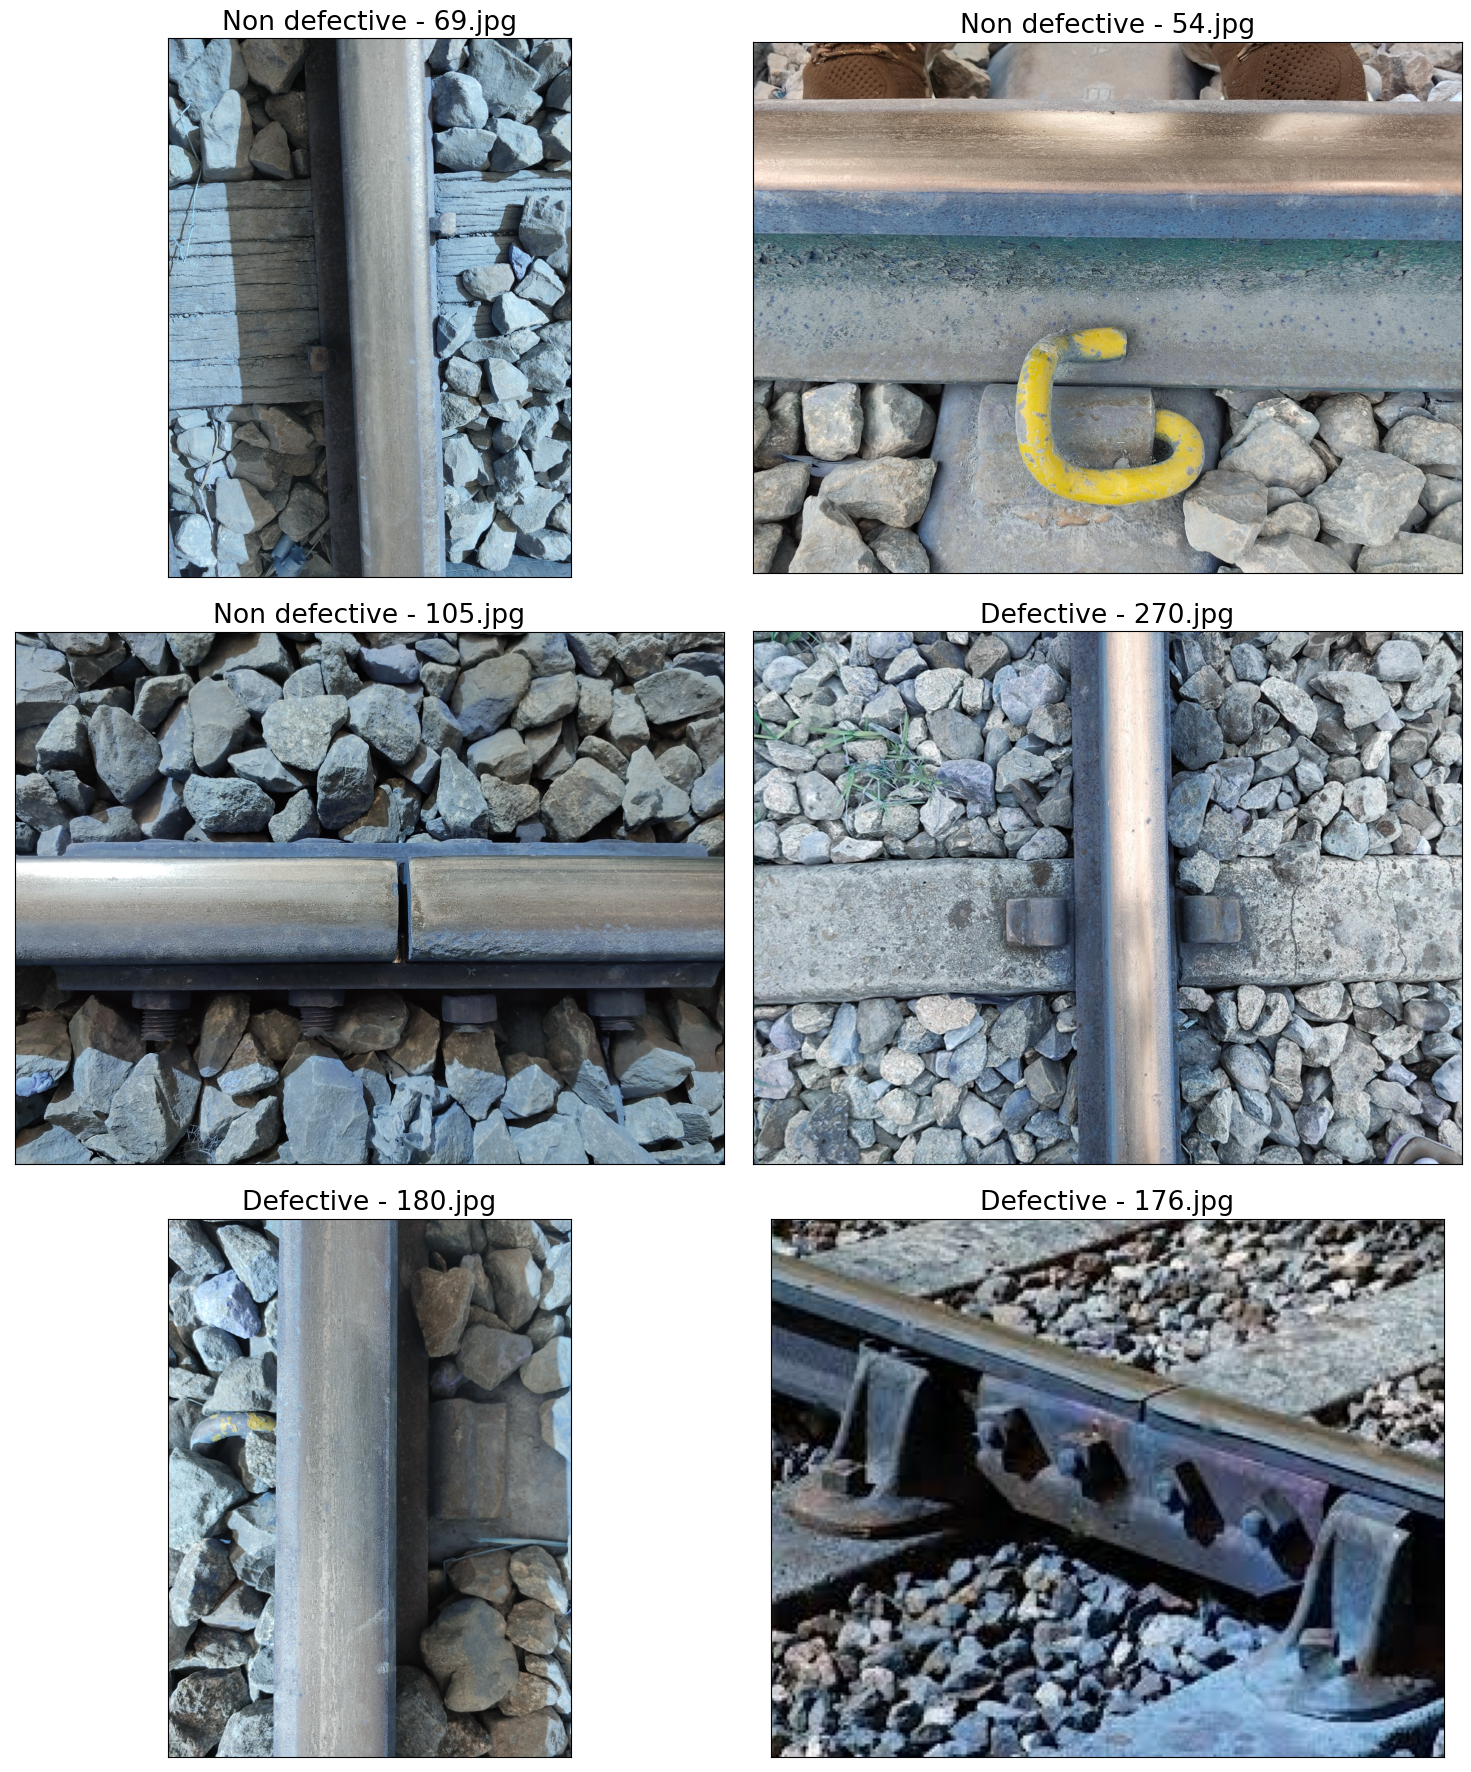

In [52]:
images.show_random_sample()

## Data exploration

---


##### Extract basic features from the images


In [24]:
height = []
width = []
components = []
R_mean = []
G_mean = []
B_mean = []

for i in tqdm(images.data.index):
    image = cv.imread(images.data.iloc[i].img)
    height.append(image.shape[0])
    width.append(image.shape[1])
    components.append(image.shape[2])
    R_mean.append(np.mean(image[:, :, 0]))
    G_mean.append(np.mean(image[:, :, 1]))
    B_mean.append(np.mean(image[:, :, 2]))

images.data.update({"height": height})
images.data.update({"width": width})
images.data.update({"components": components})
images.data.update({"R_mean": R_mean})
images.data.update({"G_mean": G_mean})
images.data.update({"B_mean": B_mean})


100%|██████████| 384/384 [01:17<00:00,  4.95it/s]


##### Shape of the images


Minimum  height  :  148  @  243
Maximum  height  :  8000  @  241
Minimum  width  :  156  @  297
Maximum  width  :  8000  @  152
Minimum  components  :  3  @  0
Maximum  components  :  3  @  0
Minimum sizes:
height    322
width     156
Name: 297, dtype: int64
height    148
width     194
Name: 243, dtype: int64


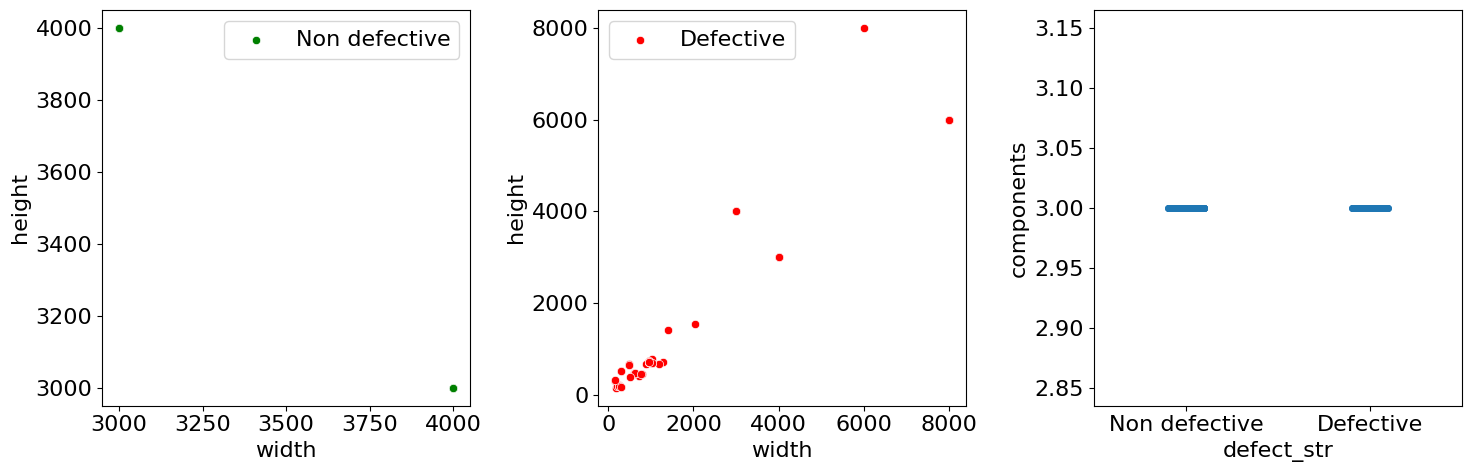

In [25]:
dims = ["height", "width", "components"]
for dim in dims:
    print("Minimum ", dim, " : ", images.data[dim].min(), " @ ", images.data[dim].argmin())
    print("Maximum ", dim, " : ", images.data[dim].max(), " @ ", images.data[dim].argmax())

min_height = np.argmin(images.data.height)
min_width = np.argmin(images.data.width)
print("Minimum sizes:")
print(images.data[["height", "width"]].iloc[min_width])
print(images.data[["height", "width"]].iloc[min_height])

fig, ax = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
sns.scatterplot(
    x="width",
    y="height",
    data=images.data[images.data.defect == 0],
    ax=ax[0],
    label="Non defective",
    color="green",
)
sns.scatterplot(
    x="width",
    y="height",
    data=images.data[images.data.defect == 1],
    ax=ax[1],
    label="Defective",
    color="red",
)
sns.stripplot(x="defect_str", y="components", data=images.data, ax=ax[2])
plt.savefig(os.path.join(images.plot_folder, "shapes.png"))
plt.show()


##### Main component distribution of the images


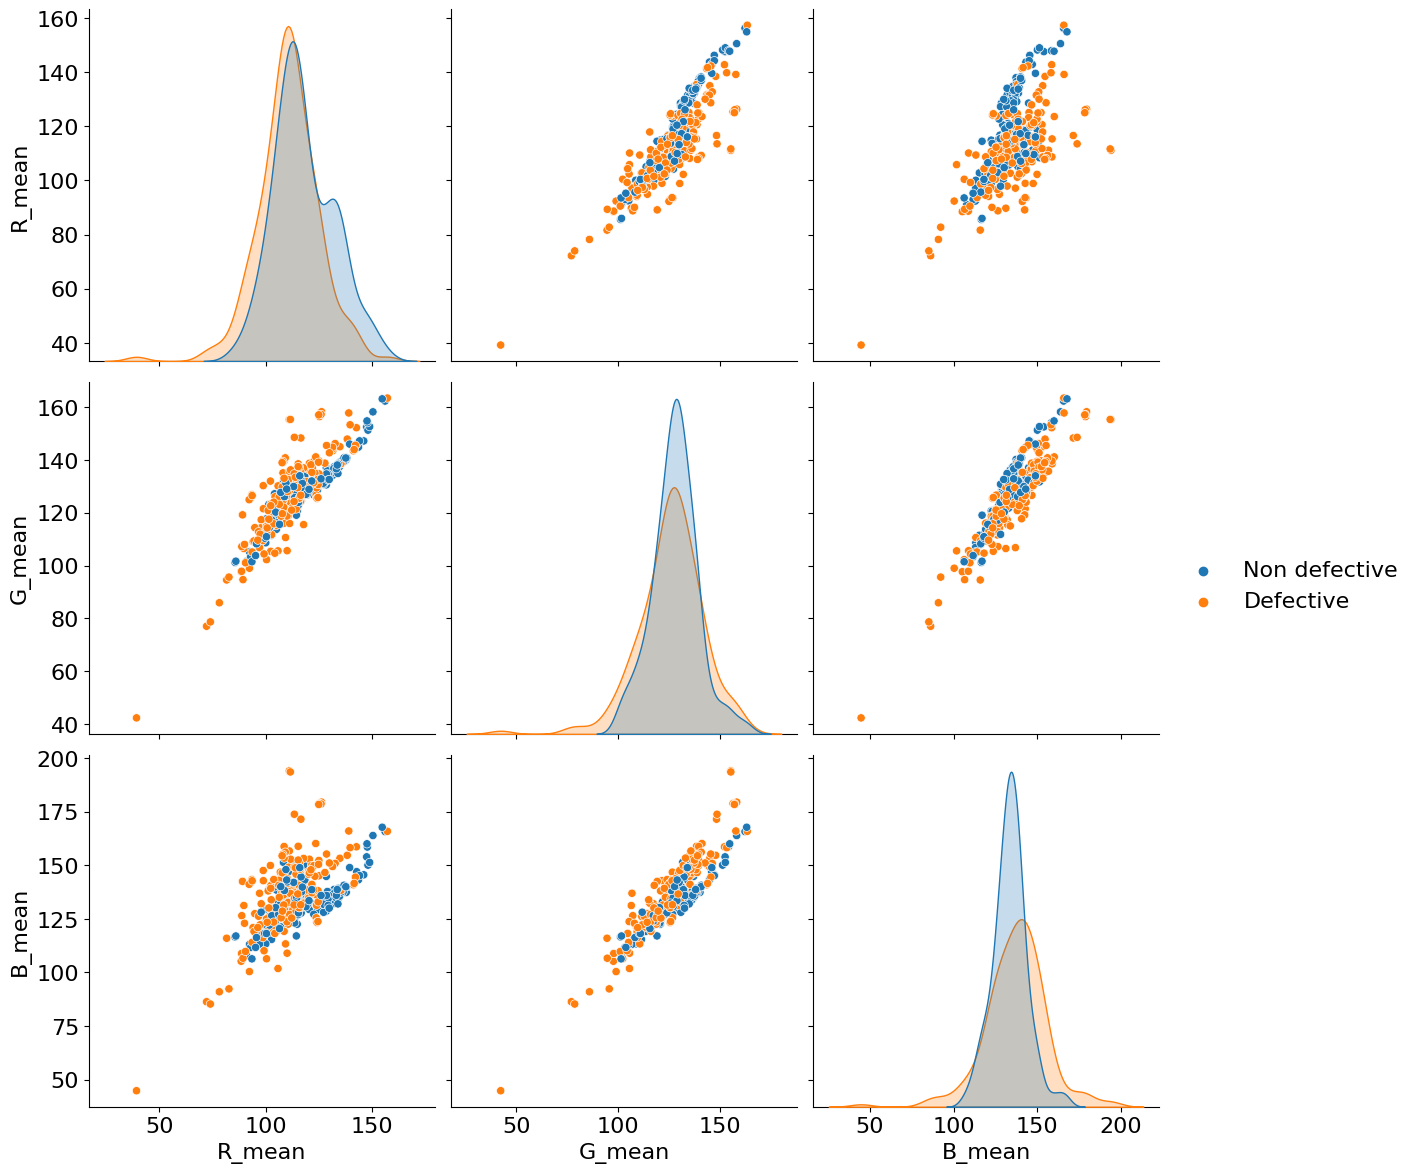

In [28]:
cols = ["R_mean", "G_mean", "B_mean"]
plot = sns.pairplot(data=images.data, vars=cols, hue="defect_str", height=4)
plot.legend.set_title(None)
plt.savefig(os.path.join(images.plot_folder, "comp_pair.png"))
plt.show()


##### Dataset balance


In [10]:
images.data.groupby(["type", "defect_str"]).count()


defect  path  filename  img  height  width  \
type       defect_str                                                  
test       Defective          11    11        11   11      11     11   
           Non defective      11    11        11   11      11     11   
train      Defective         150   150       150  150     150    150   
           Non defective     150   150       150  150     150    150   
validation Defective          31    31        31   31      31     31   
           Non defective      31    31        31   31      31     31   

                          components  R_mean  G_mean  B_mean  
type       defect_str                                         
test       Defective              11      11      11      11  
           Non defective          11      11      11      11  
train      Defective             150     150     150     150  
           Non defective         150     150     150     150  
validation Defective              31      31      31      31  
           Non defective          31      31      31      31

##### Basic information on random sample: color components on RGB and HSV


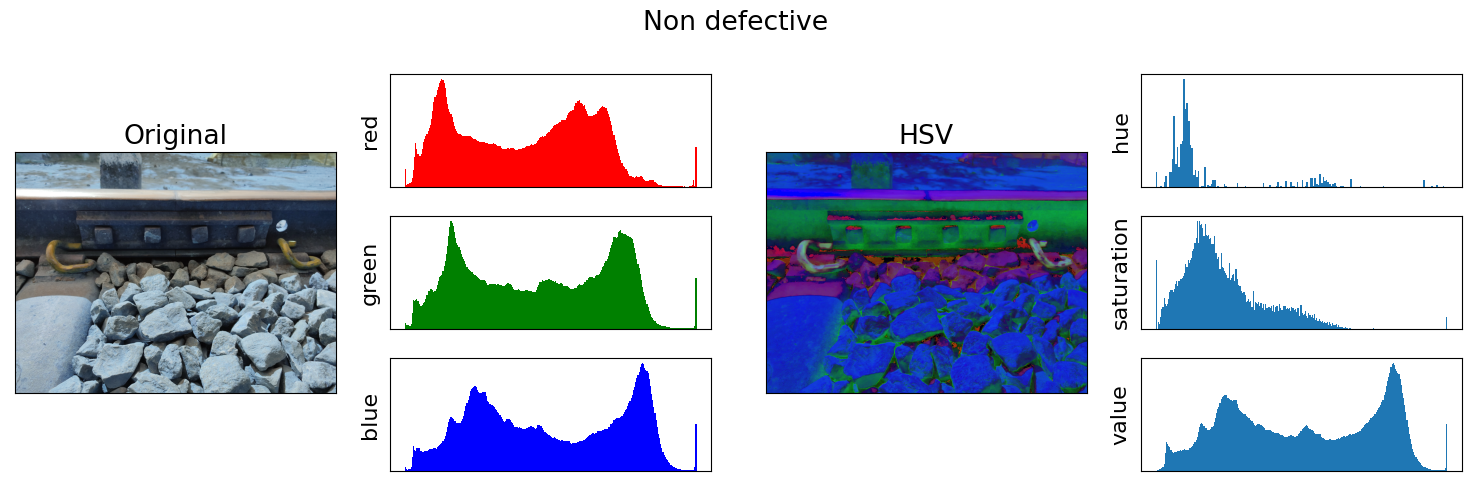

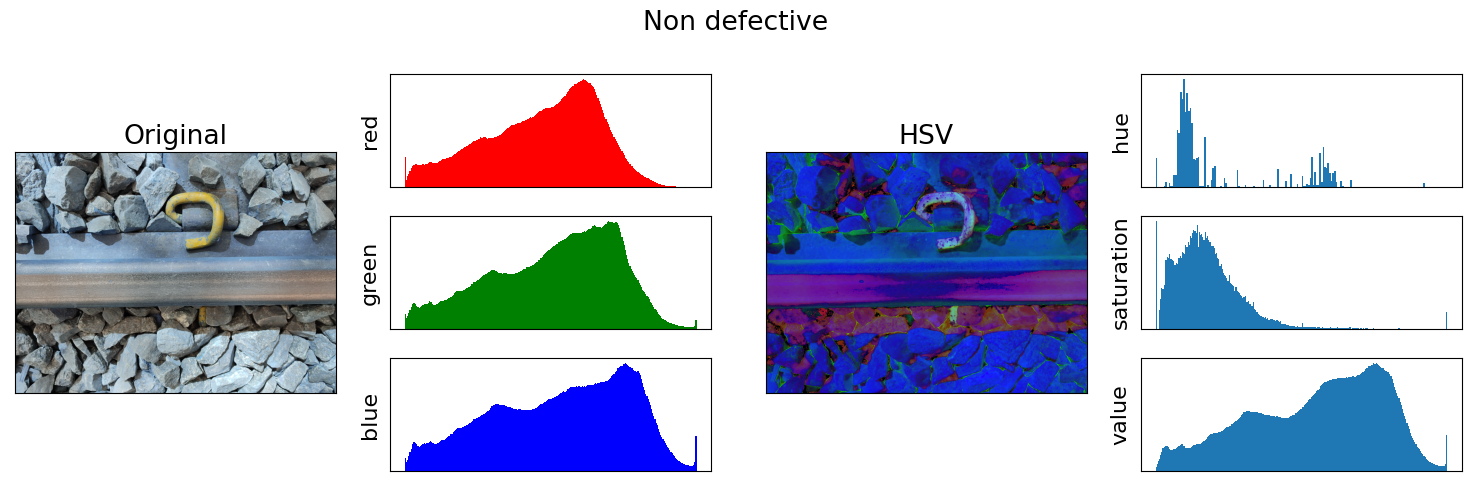

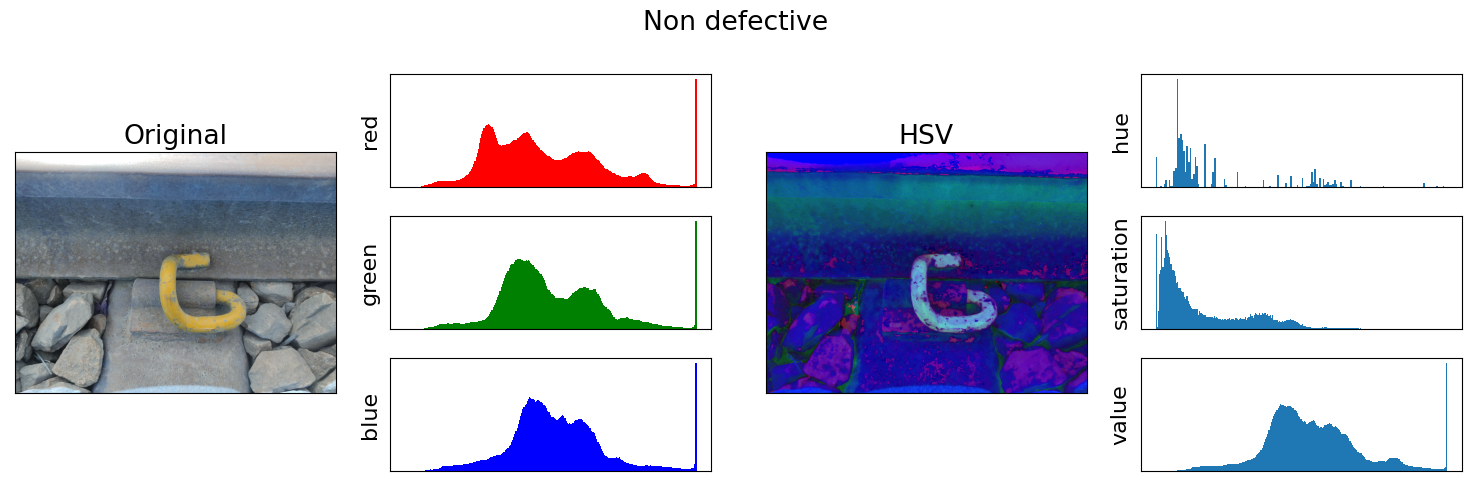

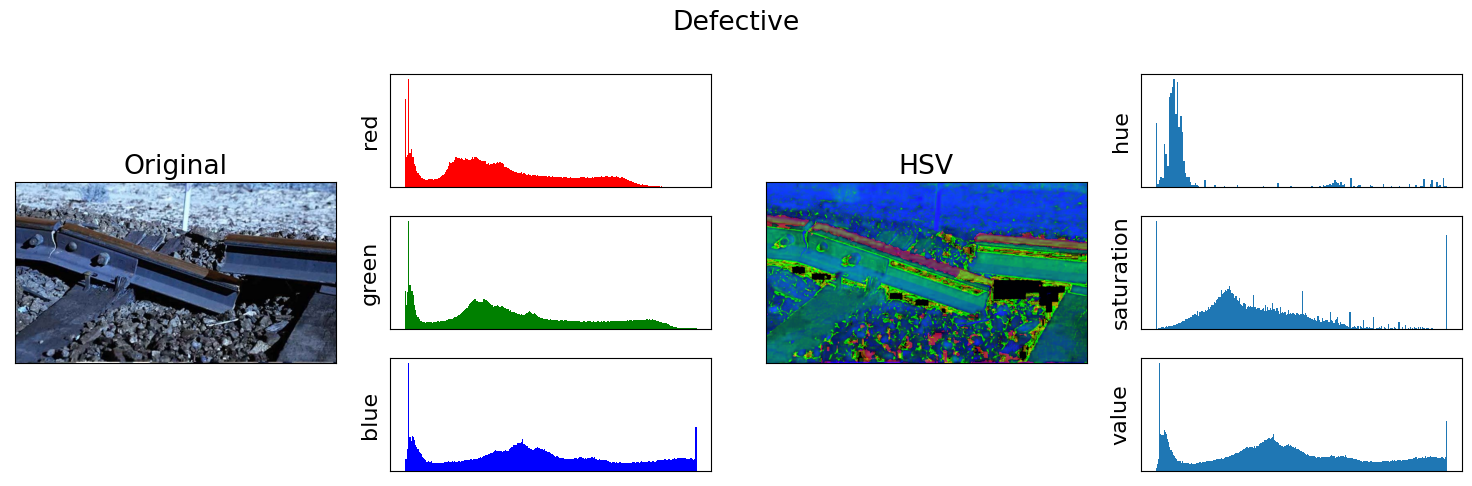

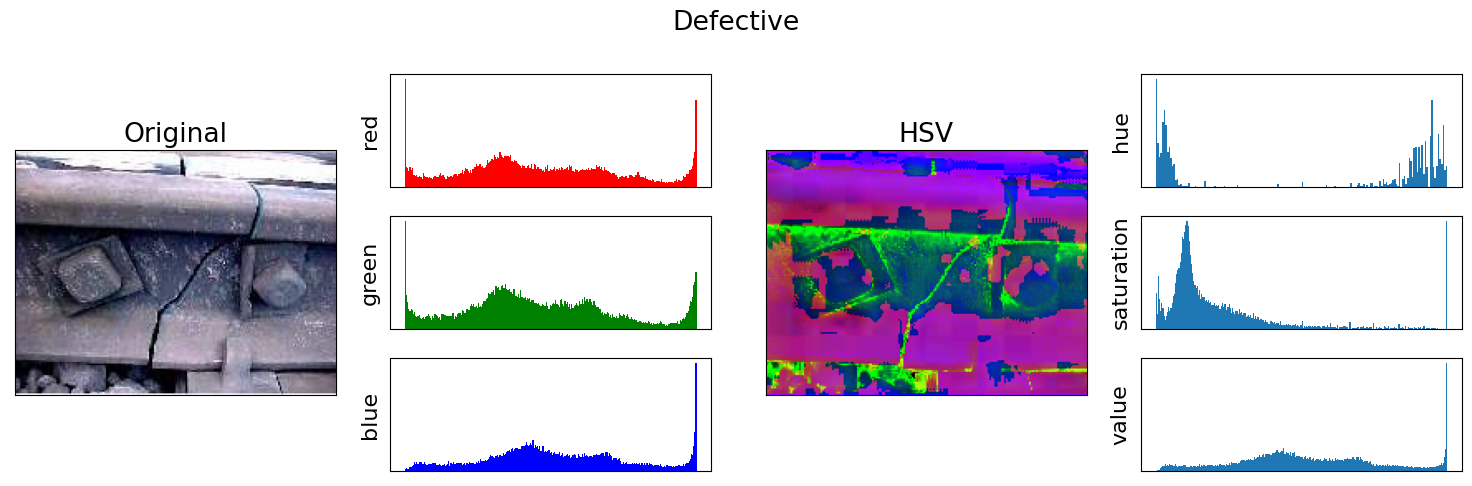

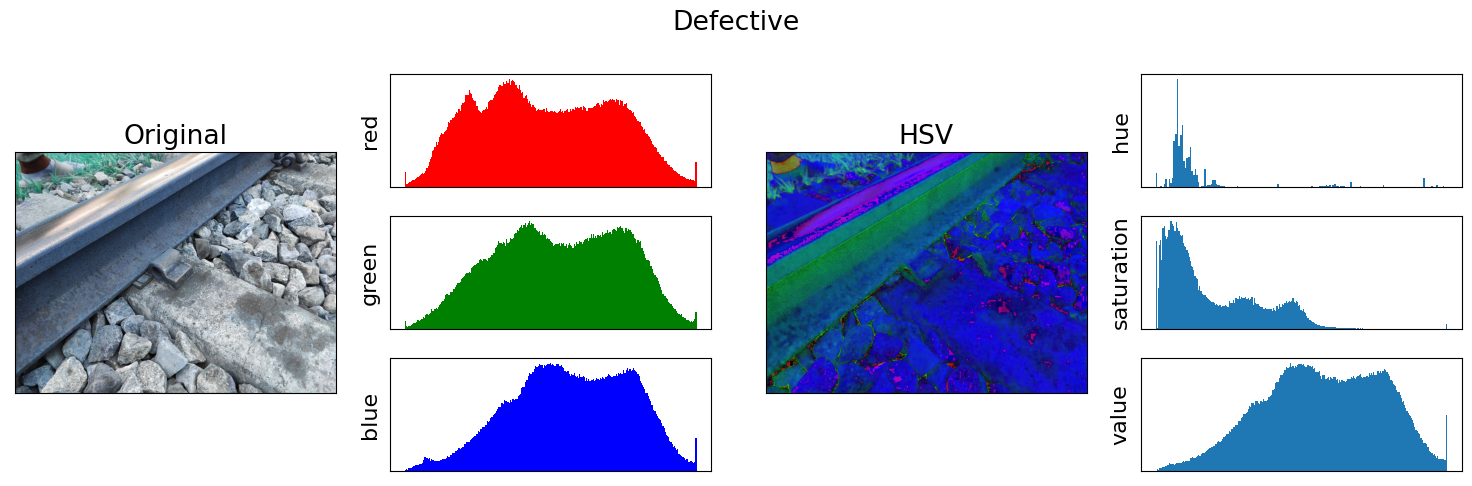

In [12]:
gs = gridspec.GridSpec(3, 4)

for s, sample in enumerate(images.random_sample[["img", "defect_str"]].itertuples()):
    fig = plt.figure(figsize=(15, 5), tight_layout=True)
    fig.suptitle(sample.defect_str)
    ax = [
        fig.add_subplot(gs[:, 0]),
        fig.add_subplot(gs[0, 1]),
        fig.add_subplot(gs[1, 1]),
        fig.add_subplot(gs[2, 1]),
        fig.add_subplot(gs[:, 2]),
        fig.add_subplot(gs[0, 3]),
        fig.add_subplot(gs[1, 3]),
        fig.add_subplot(gs[2, 3]),
    ]
    image = cv.imread(sample.img)
    ax[0].imshow(image)
    ax[0].set_title("Original")
    ax[0].set_xticks(ticks=[])
    ax[0].set_yticks(ticks=[])

    for c, component in enumerate(["red", "green", "blue"]):
        ax[c + 1].hist(image[:, :, c].ravel(), bins=256, color=component)
        ax[c + 1].set_ylabel(component)
        ax[c + 1].set_xticks(ticks=[])
        ax[c + 1].set_yticks(ticks=[])

    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    ax[4].imshow(hsv)
    ax[4].set_title("HSV")
    ax[4].set_xticks(ticks=[])
    ax[4].set_yticks(ticks=[])

    for c, component in enumerate(["hue", "saturation", "value"]):
        bins = [180, 256, 256]
        ax[c + 5].hist(hsv[:, :, c].ravel(), bins=bins[c])
        ax[c + 5].set_ylabel(component)
        ax[c + 5].set_xticks(ticks=[])
        ax[c + 5].set_yticks(ticks=[])

    filename = f"comp_analysis_{str(s)}.png"
    plt.savefig(os.path.join(images.plot_folder, filename))
    plt.show()


#### Rail surface detection

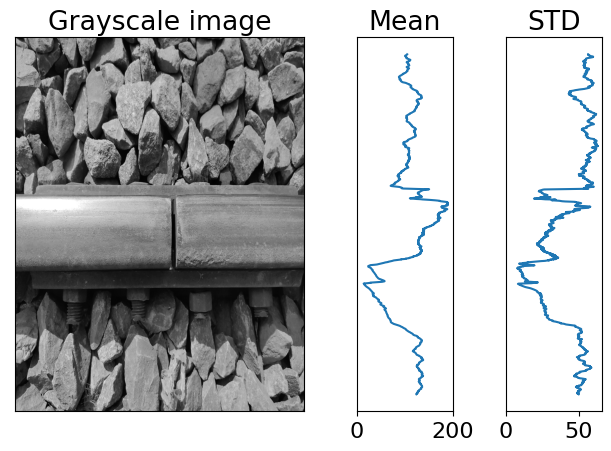

In [4]:
img = cv.imread(images.data.loc[images.data.filename == "105.jpg"].img.item())
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

row_means = np.mean(img, axis=1)
row_stds = np.std(img, axis=1)

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(
    nrows=1,
    ncols=3,
    figure=fig,
    width_ratios=[3, 1, 1],
)
ax = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[0, 2]),
]
ax[0].imshow(img, aspect='auto', cmap='gray')
ax[1].plot(row_means, -np.arange(img.shape[0]))
ax[2].plot(row_stds, -np.arange(img.shape[0]))

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([0, 200])
ax[1].set_yticks([])
ax[2].set_xticks([0, 50])
ax[2].set_yticks([])

ax[0].set_title('Grayscale image')
ax[1].set_title('Mean')
ax[2].set_title('STD')

plt.savefig(os.path.join(images.plot_folder, "rail_surf_gray.png"))
plt.show()

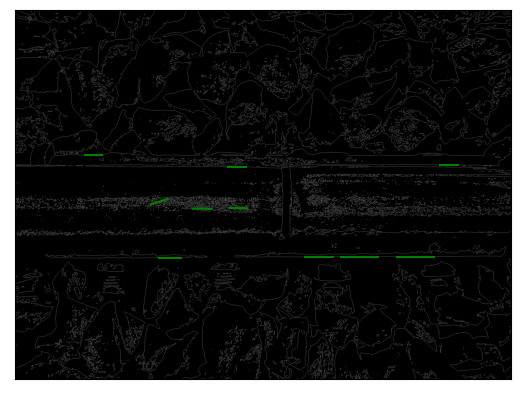

In [20]:
kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": 256, "width": 256},
    "rotate": {"angle": 45},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "threshold": {"type": "otsu"},
    "noise_filt": {"type": "Gaussian", "size": (11, 11)},
    "edge_detector": {"type": "Laplacian", "size": 1, "low": 20, "high": 120},
    "Hough": {"minLineLength": 40, "maxLineGap": 10, "maxLines": 10},
    "feat_detect": {"type": "ORB"},
}

img_proc = ImageProcessor(kwargs=kwargs)
img = cv.imread(images.data.loc[images.data.filename == "105.jpg"].img.item())
img_proc.imgs.append(img)
img_proc.grayscale()
img_proc.hist_eq()
img_proc.noise_filt()
img_proc.threshold()
img_proc.edge_detector()
img_proc.Hough()

_, ax = plt.subplots()
ax.imshow(img_proc.imgs[-1], cmap='gray', aspect='auto')
max_lines = img_proc.kwargs.get("Hough").get("maxLines")
for line in img_proc.lines[:max_lines]:
    x1, y1, x2, y2 = line[0]
    x = np.linspace(x1, x2, 100, endpoint=True)
    y = np.linspace(y1, y2, 100, endpoint=True)
    ax.plot(x, y, c="green")
ax.set_xticks([])
ax.set_yticks([])

plt.savefig(os.path.join(images.plot_folder, "rail_surf_edge.png"))
plt.show()

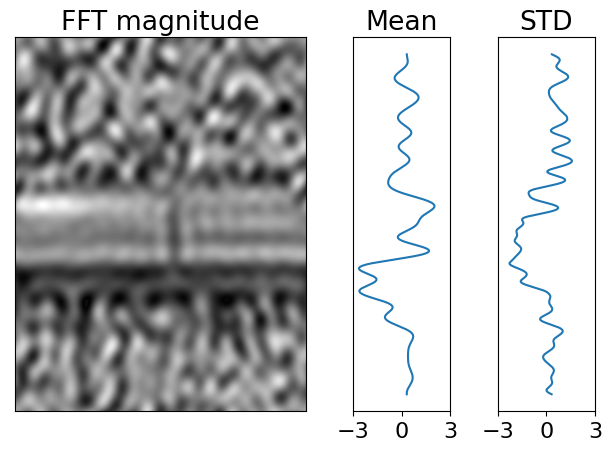

In [23]:
kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": 256, "width": 256},
    "rotate": {"angle": 45},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "threshold": {"type": "otsu"},
    "noise_filt": {"type": "Gaussian", "size": (11, 11)},
    "edge_detector": {"type": "Laplacian", "size": 1, "low": 20, "high": 120},
    "Hough": {"minLineLength": 40, "maxLineGap": 10, "maxLines": 10},
    "feat_detect": {"type": "ORB"},
}

rate = 15

img_proc = ImageProcessor(kwargs=kwargs)
img = cv.imread(images.data.loc[images.data.filename == "105.jpg"].img.item())
img_proc.imgs.append(img)
img_proc.grayscale()
img_proc.hist_eq()
img_proc.noise_filt()

img_height, img_width = img_proc.imgs[-1].shape[:2]
crow, ccol = int(img_height / 2), int(img_width / 2)

LPfilt = np.zeros((img_height, img_width, 2), np.uint8)
LPfilt[crow - rate : crow + rate, ccol - rate : ccol + rate] = 1

dft = cv.dft(np.float32(img_proc.imgs[-1]), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
fshift = dft_shift * LPfilt
f_ishift = np.fft.ifftshift(fshift)
img = cv.idft(f_ishift)
img_proc.imgs.append(cv.magnitude(img[:, :, 0], img[:, :, 1]))
img_proc.steps.append("fft")
img_proc.plot_kwargs.update({"fft": {"cmap": "gray"}})

row_means = np.mean(img_proc.imgs[-1], axis=1)
row_stds = np.std(img_proc.imgs[-1], axis=1)
row_means = (row_means - np.mean(row_means)) / np.std(row_means)
row_stds = (row_stds - np.mean(row_stds)) / np.std(row_stds)

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(
    nrows=1,
    ncols=3,
    figure=fig,
    width_ratios=[3, 1, 1],
)
ax = [
    fig.add_subplot(gs[0, 0]),
    fig.add_subplot(gs[0, 1]),
    fig.add_subplot(gs[0, 2]),
]
ax[0].imshow(img_proc.imgs[-1], aspect='auto', cmap='gray')
ax[1].plot(row_means, -np.arange(img_proc.imgs[-1].shape[0]))
ax[2].plot(row_stds, -np.arange(img_proc.imgs[-1].shape[0]))

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([-3, 0, 3])
ax[1].set_yticks([])
ax[2].set_xticks([-3, 0, 3])
ax[2].set_yticks([])

ax[0].set_title('FFT magnitude')
ax[1].set_title('Mean')
ax[2].set_title('STD')

plt.savefig(os.path.join(images.plot_folder, "rail_surf_fft.png"))
plt.show()